In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split

# Assignment 4 - Classification

For this assignment, you'll need to perform a classification on a dataset, as well as do some prep work on the data. 

The exact steps of what you need to do are flexible and up to you to some degree, however you should consider some of the important things we've mentioned recently, such as:
<ul>
<li> Is the target balanced?
<li> Are there missing or erroneous values?
<li> Are there categorical or numerical features?
<li> Is there colinearity?
<li> Are there outliers?
<li> Should we normalize? 
<li> Do the distributions of the features give any indication that some may need work? 
</ul>

Basically, the data is in the original, potentially dirty, format, and you need to find what should be cleaned, and do the cleaning. There is not one "right" answer to what has to be done, and you'll probably need to do it with at least something of an iterative process - find an issue, correct it, check the data, repeat.

<b>The target that we are predicting is the loan_status. </b>

## Grading

The grades will be broken down as follows:
<ul>
<li> <b>30%</b> - a working predictive model with a reasonable level of accuracy. 
    <ul>
    <li> For the accuracy part, it will not be explicitly graded, but compared to all the others. If you're in the same general range, that's good - if yours is drastically less accurate (or, I guess more accurate), then I'll adjust. There won't be a comparison of "this person is 72.3% and this person is only 71.8% accurate, they fail."
    <li> This data is larger than most of the small sample sets, so random variations due to train-test splits shouldn't be too bad. (If you're a keener you could loop)
    <li> I will use the F1 score as the accuracy metric. 
    </ul>
<li> <b>40%</b> - a clear and readable description of what steps you took to prepare the data, and a brief not on the rationale behind it. Did you do a log transformation to a skewed feature, did you remove outliers, did you remove a feature that has a lot of missing values? Please put this somewhere obvious and readable, consider the goal of the assignment to explain your process to me. 
    <ul>
    <li> E.g. "The target data was imbalanced, so I tried several resampling methods and chose the one with the highest accuracy of the resulting model", "the feature X had the same value for 95% of records, so I dropped it". 
    <li> In this, please also state if you see a group that appears to be a good credit risk, and a group that is a bad credit risk, and indicate the evidence showing that. Please do this other than the most simplistic way - more money = better credit. If there are no such groups, state why you think this. This will likely be about 3 - 5 statements or points, you should provide evidence from the data, but it does not need to be an essay. (You may want to consider this question after you're pretty much done with the data prep and modelling.)
    </ul>
<li> <b>30%</b> - allowing your model to be "deployed". At the bottom of this file there is a small block of code to load in some test data (that I have), and calculate your accuracy. Your contribution to this part is to have a model that is ready to make predictions. Some specifics to consider:
    <ul>
    <li> The test data will be in exactly the same format as the dataset you're given. So any steps that you took to prepare your data for modelling will need to be mirroed here, so the new  data can be predicted. The easiest way to do this is to use a pipeline, but it is up to you. Remember the model only accepts data that is in a certain format - the one that you had the data in when it was trained, so when making predictions you need to make sure that is true. 
    <li> Since I'm providing test data, and your task is to just create a model, think about how that might impact your train-test splitting, both as you're developing and for the final product. 
    <li> Once the model is trained it should predict any data that is in the right format, so I should be able to provide any proper dataset, click run on that testing cell, and get predictions. I will not be doing anything that will purposefully make this harder or trickier, like including data that has errors or is in the wrong format, I just split the entire set of data, reserved part of it to test accuracy, and gave the rest to you. Things that you've changed (e.g. dropping a column, one-hot encoding) do need to be replicated at some point before the model can accept the new data to predict. In general we <b>do</b> want to check in our processing that our input is valid, this is kind of a junior introduction to that. 
    </ul>
</ul

## Load Credit Data

In [5]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,26967,27,120000,MORTGAGE,3.0,PERSONAL,B,14000,11.99,0,0.12,N,10
1,8449,24,58000,MORTGAGE,8.0,DEBTCONSOLIDATION,A,15700,7.90,0,0.27,N,3
2,20983,30,45000,RENT,11.0,MEDICAL,C,5000,12.73,1,0.11,Y,8
3,19612,35,35000,MORTGAGE,5.0,EDUCATION,B,5600,11.49,0,0.16,N,6
4,30371,38,55000,RENT,0.0,EDUCATION,C,6500,11.03,0,0.12,Y,12


------------------ANSWER -----------
<li> 1)loaded train data.
<li>2)checked data for misrepresentation which i did not find any.
<li>3) checked data for missing value -- there was missing values for two columns.i had three options- remove missing values,remove column,imputation
as missing value was lil percentage i chose option to remove missing rows as other options could introduce error.
<li>4) Outliers- i detected some outliers and removed them.
<li>5)Colinearity-- i checked vif values, found some multicollinearity and made mode for both -with feature and removing featues that has high vif values
<li>6) checked distribution - person_cred_hist_length appears to be skewed,changed to log distribution.
<li>7)used one hot encoding for categorical featues.
<li>8)loan_status was not balanced - 
tried various resampling methods.chose SVMSMOTE rescaling as f1 score was highest.
<li>9)tried both minmax scale and standarised scale for rescaling.& chose minmax scale as f1 score was better with standarised scale.
<li>10)made logistic regression model
<li>11)loaded test data
<li>12) predicted accuracy for various scales and resampling methods & with removing high vif features and without removing them.& chose to keep 
all attributes.
<ul>

In [6]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,26967,27,120000,MORTGAGE,3.0,PERSONAL,B,14000,11.99,0,0.12,N,10
1,8449,24,58000,MORTGAGE,8.0,DEBTCONSOLIDATION,A,15700,7.90,0,0.27,N,3
2,20983,30,45000,RENT,11.0,MEDICAL,C,5000,12.73,1,0.11,Y,8
3,19612,35,35000,MORTGAGE,5.0,EDUCATION,B,5600,11.49,0,0.16,N,6
4,30371,38,55000,RENT,0.0,EDUCATION,C,6500,11.03,0,0.12,Y,12


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26064.0,16307.473258,9396.129345,0.00,8202.25,16324.50,24458.25,32580.00
person_age,26064.0,27.738375,6.381305,20.00,23.00,26.00,30.00,144.00
person_income,26064.0,66027.949893,62650.976785,4080.00,38793.75,55000.00,79200.00,6000000.00
person_emp_length,25350.0,4.791440,4.100277,0.00,2.00,4.00,7.00,123.00
loan_amnt,26064.0,9595.886088,6321.894580,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,23575.0,11.006839,3.245217,5.42,7.90,10.99,13.47,23.22
loan_status,26064.0,0.216812,0.412082,0.00,0.00,0.00,0.00,1.00
loan_percent_income,26064.0,0.170264,0.106673,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,26064.0,5.805210,4.055158,2.00,3.00,4.00,8.00,30.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26064 entries, 0 to 26063
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  26064 non-null  int64  
 1   person_age                  26064 non-null  int64  
 2   person_income               26064 non-null  int64  
 3   person_home_ownership       26064 non-null  object 
 4   person_emp_length           25350 non-null  float64
 5   loan_intent                 26064 non-null  object 
 6   loan_grade                  26064 non-null  object 
 7   loan_amnt                   26064 non-null  int64  
 8   loan_int_rate               23575 non-null  float64
 9   loan_status                 26064 non-null  int64  
 10  loan_percent_income         26064 non-null  float64
 11  cb_person_default_on_file   26064 non-null  object 
 12  cb_person_cred_hist_length  26064 non-null  int64  
dtypes: float64(3), int64(6), object

In [9]:
df = df.dropna()
df.isna().sum()

Unnamed: 0                    0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

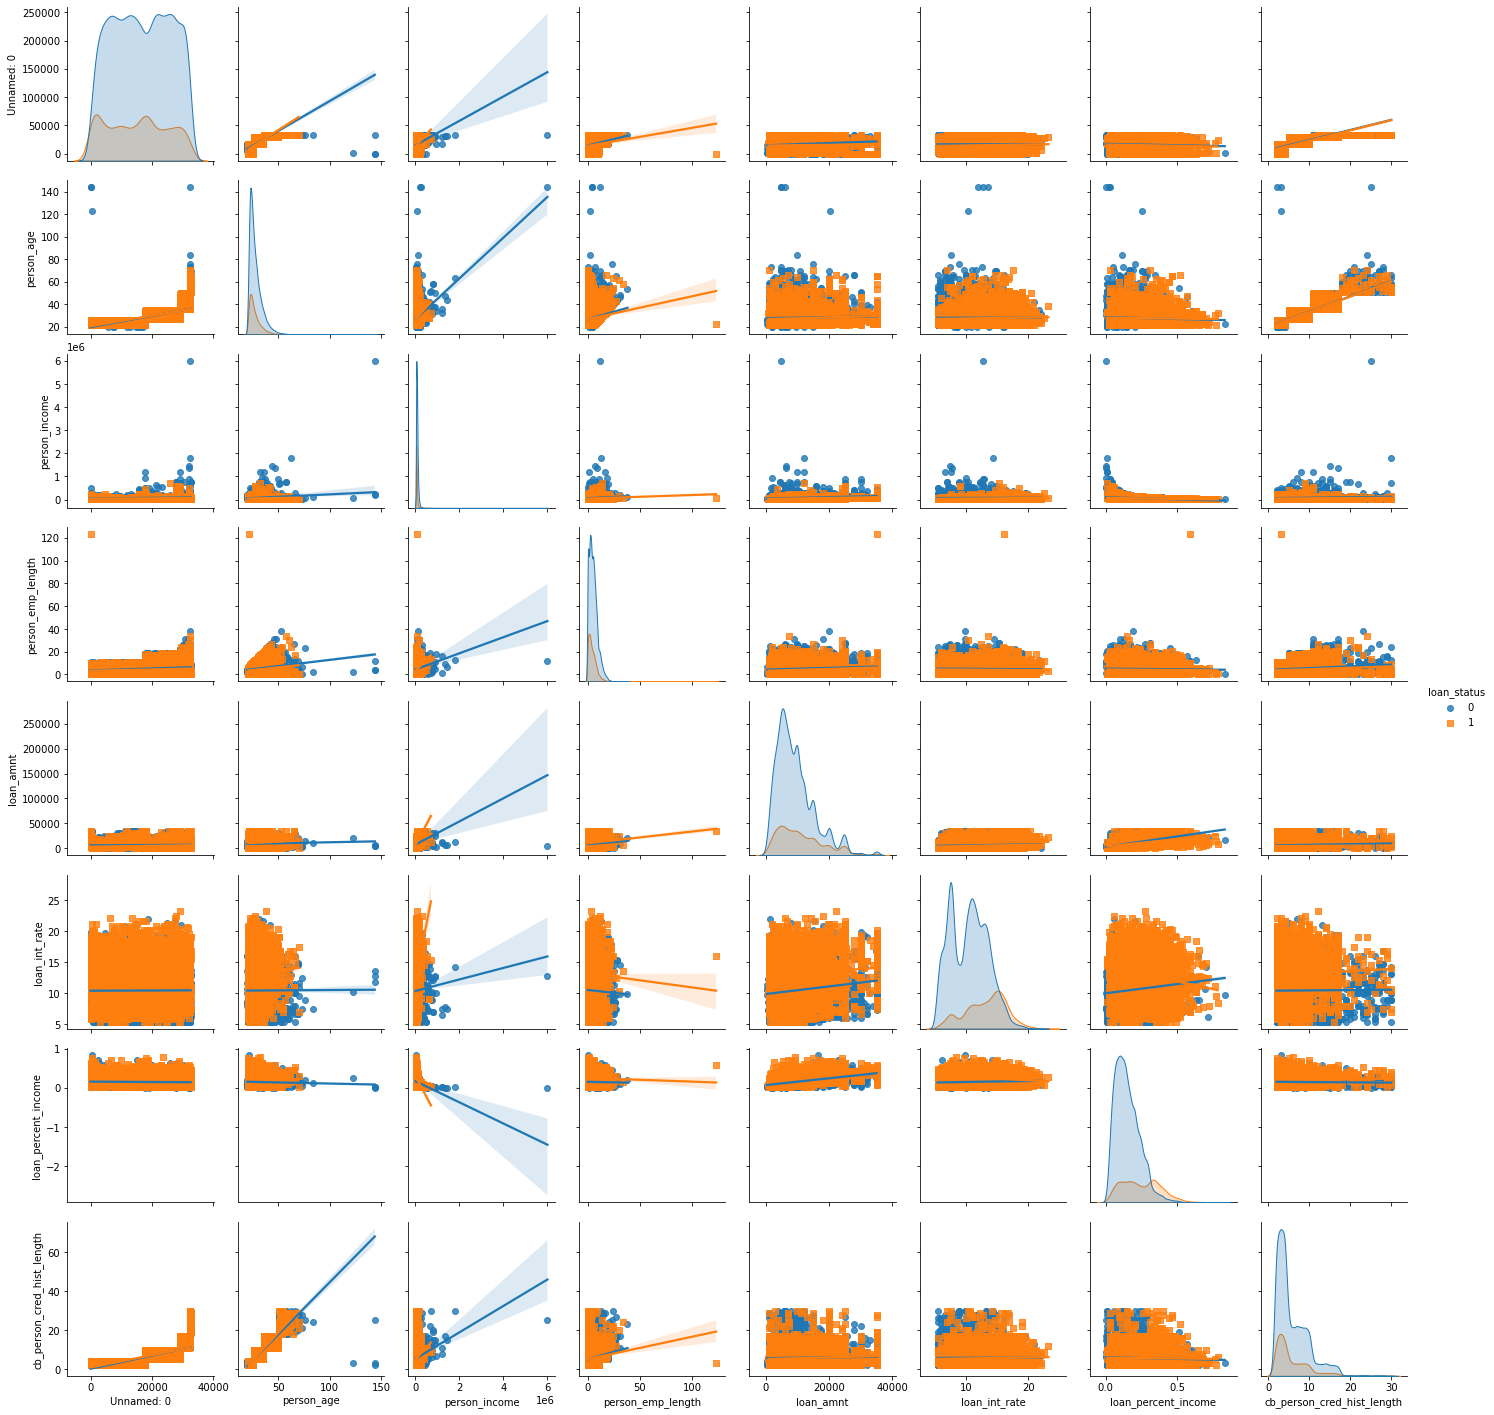

In [10]:
sns.pairplot(df, dropna=True, kind="reg",hue="loan_status",markers=["o","s"],height=2.5,aspect=1)
plt.show()

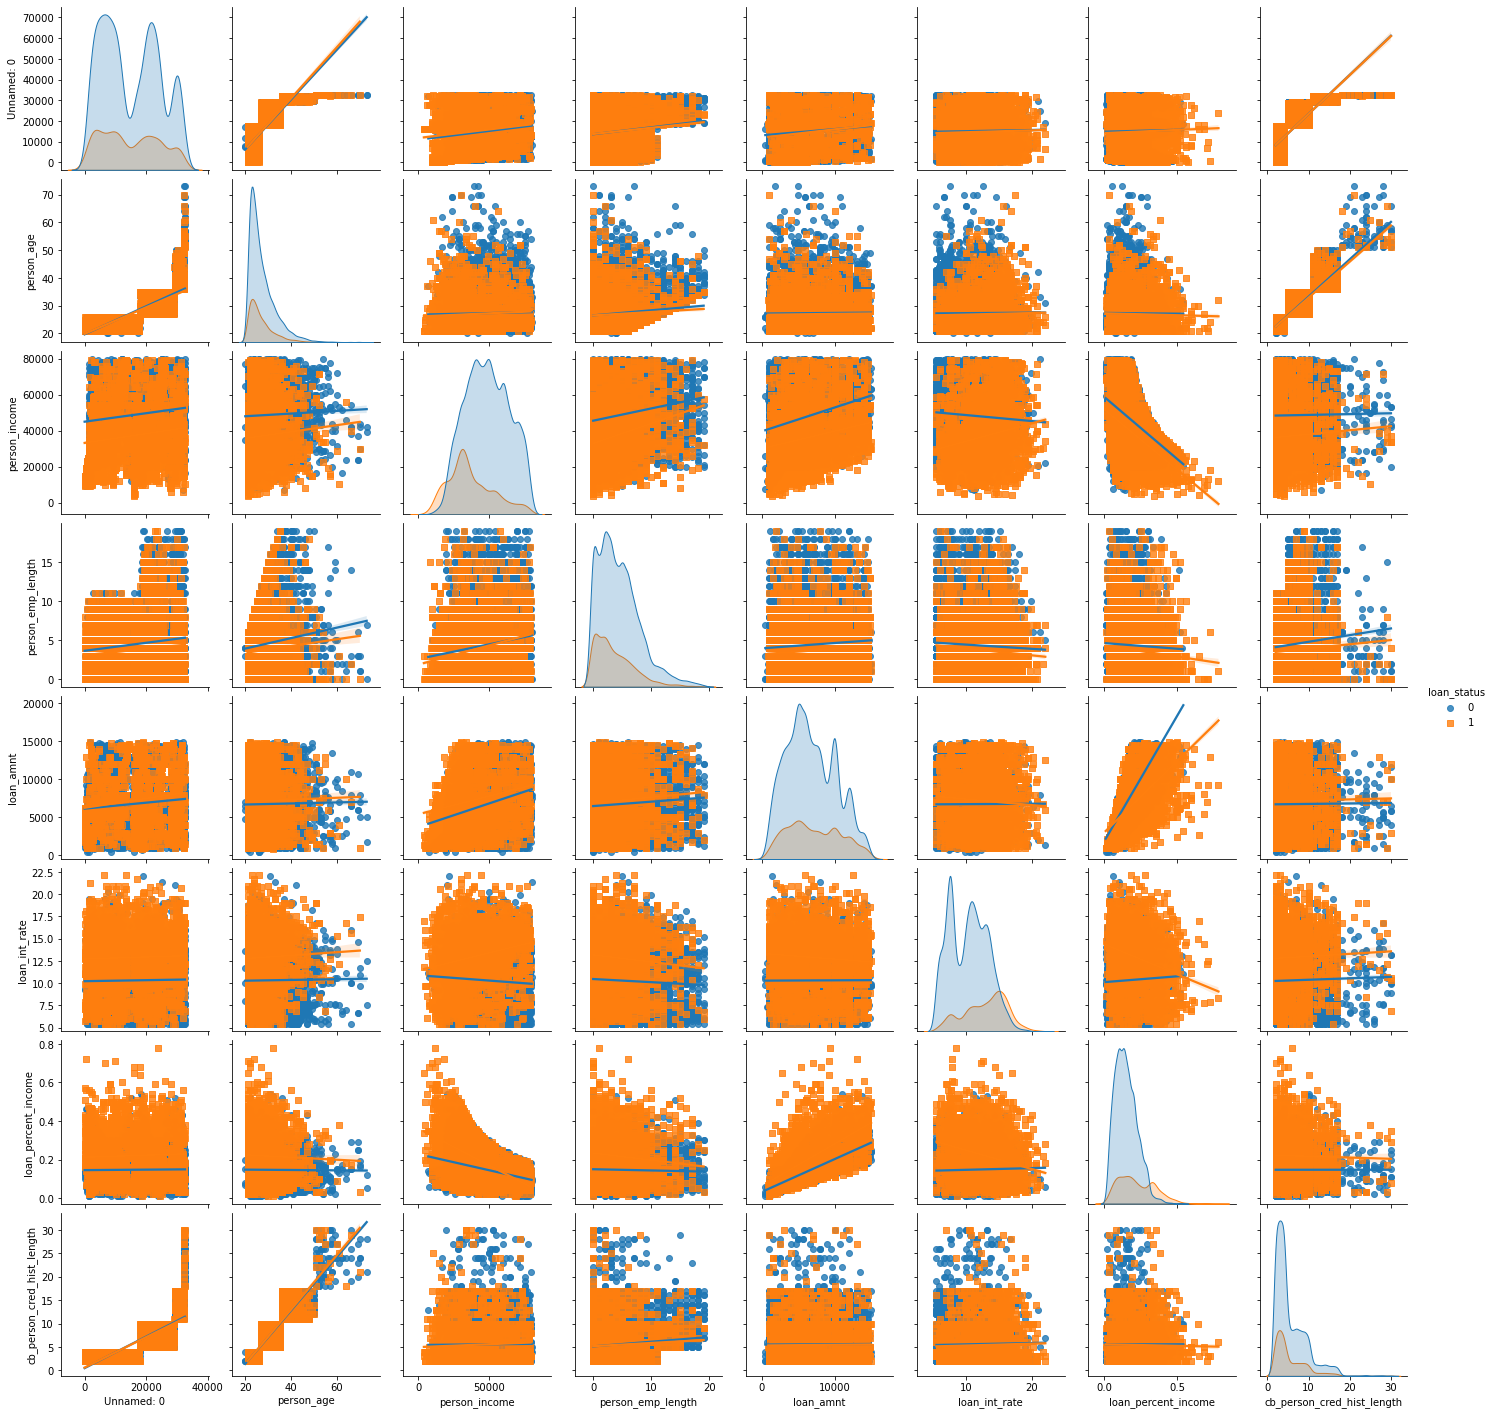

In [11]:
#filtering outliers
df = df[df["person_age"] < 80]
df = df[df["person_income"] < 80000]
df = df[df["person_emp_length"] <20]
df=  df[df["loan_amnt"] < 15000]
sns.pairplot(df, dropna=True, kind="reg",hue="loan_status",markers=["o","s"],height=2.5,aspect=1)
plt.show()

<AxesSubplot:xlabel='cb_person_cred_hist_length', ylabel='Density'>

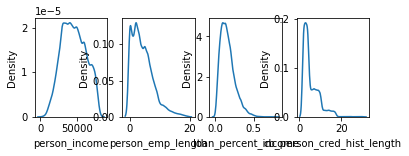

In [12]:
thinkplot.PrePlot(2,2,4)
sns.kdeplot(df["person_income"])
thinkplot.SubPlot(2)
sns.kdeplot(df["person_emp_length"])
thinkplot.SubPlot(3)
sns.kdeplot(df["loan_percent_income"])
thinkplot.SubPlot(4)
sns.kdeplot(df["cb_person_cred_hist_length"])

In [13]:
df["cb_person_cred_hist_length"]= np.array(np.log(df["cb_person_cred_hist_length"]))

0    11387
1     3293
Name: loan_status, dtype: int64
0.7756811989100817


<AxesSubplot:xlabel='loan_status', ylabel='count'>

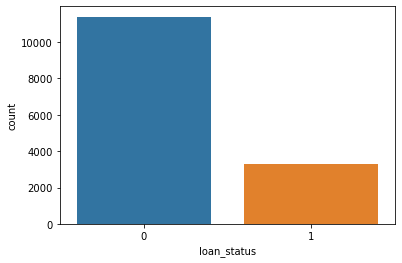

In [14]:
a=df["loan_status"].value_counts()
print(a)
print(len(df[df["loan_status"]==0])/len(df))
sns.countplot(data=df, x="loan_status")

In [15]:
df = df.drop(columns={"Unnamed: 0"})
df = pd.get_dummies(df, drop_first=True)
df.head().T

,2,3,4,5,6
person_age,30.000000,35.000000,38.000000,39.000000,21.000000
person_income,45000.000000,35000.000000,55000.000000,60000.000000,12000.000000
person_emp_length,11.000000,5.000000,0.000000,4.000000,1.000000
loan_amnt,5000.000000,5600.000000,6500.000000,4300.000000,1000.000000
loan_int_rate,12.730000,11.490000,11.030000,7.490000,13.980000
loan_status,1.000000,0.000000,0.000000,0.000000,0.000000
loan_percent_income,0.110000,0.160000,0.120000,0.070000,0.080000
cb_person_cred_hist_length,2.079442,1.791759,2.484907,2.833213,0.693147
person_home_ownership_OTHER,0.000000,0.000000,0.000000,0.000000,0.000000
person_home_ownership_OWN,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Attributes"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
#Check VIFs
vifs_1 = calc_vif(df).sort_values(by="VIF", ascending=False)
vifs_1

,Attributes,VIF
4,loan_int_rate,73.140810
0,person_age,53.064206
3,loan_amnt,27.854224
1,person_income,27.550868
6,loan_percent_income,25.252643
7,cb_person_cred_hist_length,18.798127
17,loan_grade_C,7.002337
18,loan_grade_D,6.289893
16,loan_grade_B,4.626383
10,person_home_ownership_RENT,3.145427


In [17]:
#removed attributes with high vif
#cols_rem_1 = vifs_1["Attributes"].to_list()
#print(cols_rem_1)
#df_filt = df.drop(columns=cols_rem_1[0:5],inplace=True)
#df_filt.head()

In [18]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score

In [19]:
#Model with all attributes
#sampler = RandomOverSampler()
#sampler = RandomUnderSampler()
#sampler = TomekLinks(sampling_strategy='not majority', n_jobs=-1)
#sampler = SMOTE(n_jobs=-1)
#sampler = ADASYN(n_jobs=-1)
sampler = SVMSMOTE(n_jobs=-1)
y1= np.array(df["loan_status"]).reshape(-1,1)
x1 = np.array(df.drop(columns={"loan_status"}))
print(y1.shape,x1.shape)
xtrain, ytrain = sampler.fit_resample(x1,y1)
print('Resampled dataset shape %s' % Counter(ytrain))
#Normalize data
scaler = MinMaxScaler()
#scaler = StandardScaler()
x_train_norm = scaler.fit_transform(xtrain)
model = LogisticRegression(max_iter=1000, n_jobs=-1).fit(x_train_norm,ytrain.ravel())

(14680, 1) (14680, 22)
Resampled dataset shape Counter({1: 11387, 0: 11387})


In [20]:
#Model without attributes having high vif- columns showing multicollinearity dropped
#sampler = SVMSMOTE(n_jobs=-1)
#y1= np.array(df_filt["loan_status"]).reshape(-1,1)
#x1 = np.array(df_filt.drop(columns={"loan_status"}))
#print(y1.shape,x1.shape)
#xtrain, ytrain = sampler.fit_resample(x1,y1)
#print('Resampled dataset shape %s' % Counter(ytrain))
#Normalize data
#scaler = MinMaxScaler()
#scaler = StandardScaler()
#x_train_norm = scaler.fit_transform(xtrain)
#model = LogisticRegression(max_iter=1000, n_jobs=-1).fit(x_train_norm,ytrain.ravel())

### Accuracy Test

Replace the green part with whatever you need to transform the fresh data into the format needed for your model to predict. 

<b>Note:</b> you could test and make sure that things are working OK here by taking part of your dataset, saving it in a separate CSV, and running it through here as a piece of test data. The accuracy results would be useless, but you'd confirm that the model works properly. 

In [23]:
df_ = pd.read_csv("credit_risk_dataset.csv")
train,test= train_test_split(df_,test_size=0.2)
test.shape

(6517, 12)

In [24]:
test.to_csv('._test.csv')
d_test = pd.read_csv("._test.csv")

(14680, 1) (14680, 22)
Resampled dataset shape Counter({0: 2882, 1: 2882})
F1: 0.8294127323572956
Acc: 0.8200902151283831
Recall: 0.8747397640527411
Precision: 0.7885517672818267


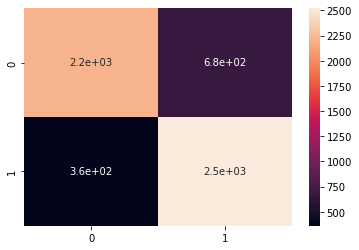

In [63]:
d_test.isnull().sum().sort_values()
d_test = d_test.dropna()
d_test.isna().sum()
d_test = d_test[d_test["person_age"] < 80]
d_test = d_test[d_test["person_income"] < 80000]
d_test = d_test[d_test["person_emp_length"] <20]
d_test=  d_test[d_test["loan_amnt"] < 15000]
#d_test = d_test.drop(columns={"Unnamed: 0"})
d_test = pd.get_dummies(d_test, drop_first=True)
y2= np.array(d_test["loan_status"]).reshape(-1,1)
x2 = np.array(d_test.drop(columns={"loan_status"}))
print(y1.shape,x1.shape)
xtest, ytest = sampler.fit_resample(x2,y2)
print('Resampled dataset shape %s' % Counter(ytest))
scaler = MinMaxScaler()
X_test_norm = scaler.fit_transform(xtest)
preds = model.predict(X_test_norm)

#Generate 1/0 results and show results
prediction_labels = binarize(np.array(preds).reshape(-1,1), threshold=.5)
conf_matrix = confusion_matrix(ytest,prediction_labels)
sns.heatmap(conf_matrix, annot=True)

print("F1:",f1_score(ytest,prediction_labels))
print("Acc:",accuracy_score(ytest,prediction_labels))
print("Recall:",recall_score(ytest,prediction_labels))
print("Precision:",precision_score(ytest,prediction_labels))


In [ ]:
#test with columns having high vif (showing multicolinearity removed)
#d_test.isnull().sum().sort_values()
#d_test = d_test.dropna()
#d_test.isna().sum()
#d_test = d_test[d_test["person_age"] < 80]
#d_test = d_test[d_test["person_income"] < 80000]
#d_test = d_test[d_test["person_emp_length"] <20]
#d_test=  d_test[d_test["loan_amnt"] < 15000]
#d_test = d_test.drop(columns={"Unnamed: 0"})
#d_test = pd.get_dummies(d_test, drop_first=True)
#vifs_1 = calc_vif(d_test).sort_values(by="VIF", ascending=False)
#cols_rem_1 = vifs_1["Attributes"].to_list()
#print(cols_rem_1)
#d_test = d_test.drop(columns=cols_rem_1[0:5])
#y2= np.array(d_test["loan_status"]).reshape(-1,1)
#x2 = np.array(d_test.drop(columns={"loan_status"}))
#print(y1.shape,x1.shape)
#xtest, ytest = sampler.fit_resample(x2,y2)
#print('Resampled dataset shape %s' % Counter(ytest))
#scaler = MinMaxScaler()
#X_test_norm = scaler.fit_transform(xtest)
#preds = model.predict(X_test_norm)
#prediction_labels = binarize(np.array(preds).reshape(-1,1), threshold=.5)
#conf_matrix = confusion_matrix(ytest,prediction_labels)
#sns.heatmap(conf_matrix, annot=True)
#print("F1:",f1_score(ytest,prediction_labels))
#print("Acc:",accuracy_score(ytest,prediction_labels))
#print("Recall:",recall_score(ytest,prediction_labels))
#print("Precision:",precision_score(ytest,prediction_labels))

##Accuracy results

<ul>f1 scores with following sampling methods--
<li>SVMSMOTE  = .82
<li>ADASVN = .79
<li>SMOTE = .79
<li>Tomeklinks=.62
<li>random undersampling=.79
<li>Random oversampling=.78
</ul>with standard scale= .66
<li>i chose SVMSOTE sampler, scaler-minmax ,got f1=0.829

<li>if i removed attributes havinh gigh vif value then accuracy scores are f1=0.74, acc=0.74,recall=0.74,precision=0.75
f1 scores were low,so i chose not to drop these columns,usually in real life age,person income,loan amnt,interest amnt play an imp role in predicting his loan status.